In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [21]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [22]:
data =  data.dropna(subset=["dropoff_longitude","dropoff_latitude"])
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [23]:
data = data.drop("Unnamed: 0", axis=1)
data = data.drop("key", axis=1)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [25]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data.head()
data = data.drop("pickup_datetime", axis=1)


In [26]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,3.048435
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,19.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,6.000000


In [27]:
from sklearn.preprocessing import StandardScaler
columns=data.columns
real_data = data
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)

<Axes: >

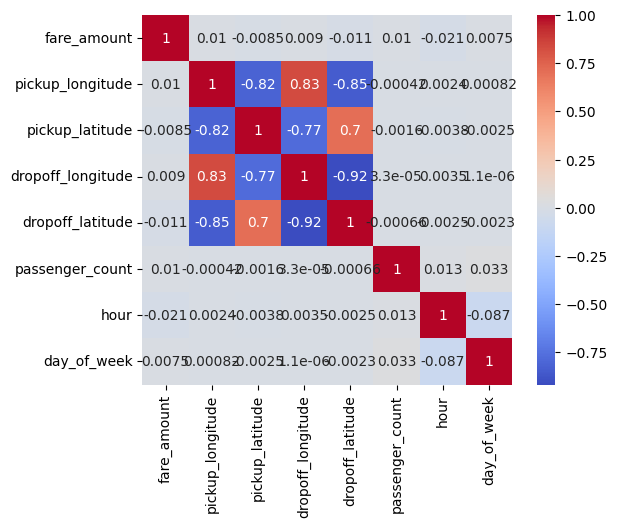

In [28]:
corr =real_data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",square=True)

<Axes: xlabel='passenger_count', ylabel='count'>

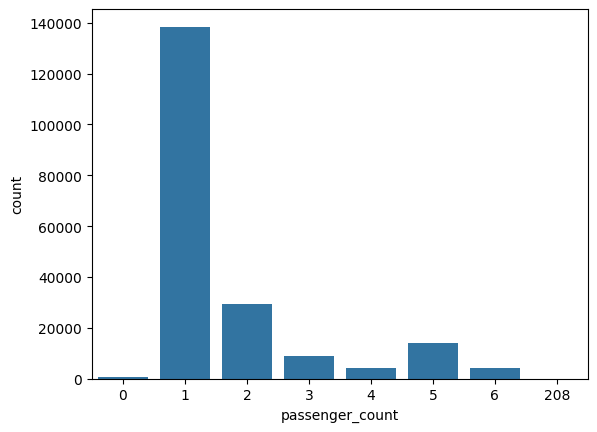

In [29]:
sns.countplot(x="passenger_count", data=real_data)

<Axes: xlabel='passenger_count', ylabel='day_of_week'>

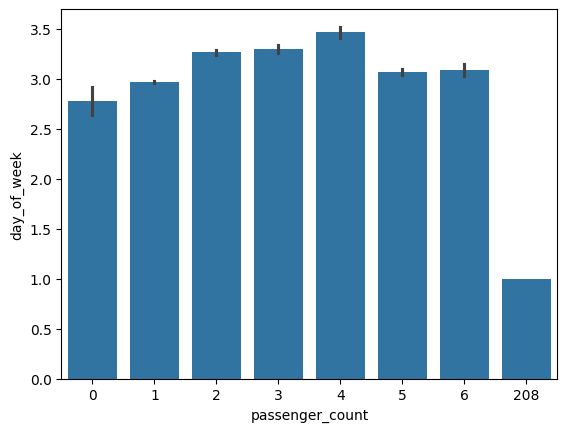

In [30]:
sns.barplot(x="passenger_count",y="day_of_week",data=real_data)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

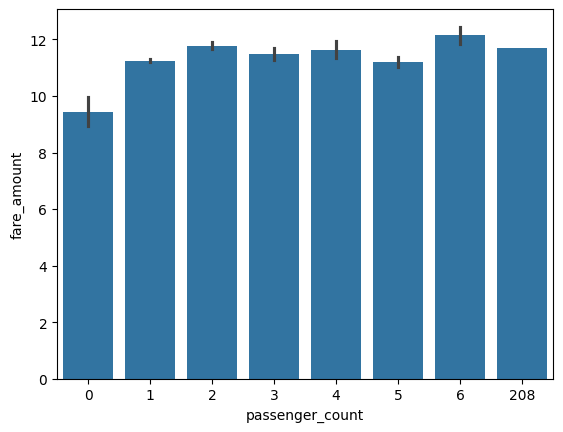

In [31]:
sns.barplot(x="passenger_count",y="fare_amount",data=real_data)

In [32]:
x= data[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'hour', 'day_of_week']]
y= data[["fare_amount"]]

In [33]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_percentage_error

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
y_pred = LR_model.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RSME = root_mean_squared_error(y_test, y_pred)


print(f"MAE: {MAE}")
print(f"MSE:{MSE}")
print(f"r2:{r2}")
print(f"RSME:{RSME}")


MAE: 0.6124235010246329
MSE:1.0600185343943231
r2:0.0009141588749785878
RSME:1.0295720151569405


In [35]:
from sklearn.tree import DecisionTreeRegressor


DT_model = DecisionTreeRegressor(max_depth=12,min_samples_leaf=3, min_samples_split=3)
DT_model.fit(x_train, y_train)
y_pred = DT_model.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RSME = root_mean_squared_error(y_test, y_pred)


print(f"MAE: {MAE}")
print(f"MSE:{MSE}")
print(f"r2:{r2}")
print(f"RSME:{RSME}")


MAE: 0.32267381971996145
MSE:0.39384515198966863
r2:0.6287941180448879
RSME:0.6275708342407801


In [36]:
from sklearn.ensemble import RandomForestRegressor


RT_model = RandomForestRegressor(n_estimators=5)
RT_model.fit(x_train, y_train)
y_pred = RT_model.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RSME = root_mean_squared_error(y_test, y_pred)


print(f"MAE: {MAE}")
print(f"MSE:{MSE}")
print(f"r2:{r2}")
print(f"RSME:{RSME}")


c:\Users\Admin\Documents\MyProjects\uber prediction\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 0.25347575095397934
MSE:0.36182045447226857
r2:0.6589779505136548
RSME:0.6015151323718038


In [37]:
from sklearn.neighbors import KNeighborsRegressor


kn_model = KNeighborsRegressor()
kn_model.fit(x_train, y_train)
y_pred = kn_model.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RSME = root_mean_squared_error(y_test, y_pred)


print(f"MAE: {MAE}")
print(f"MSE:{MSE}")
print(f"r2:{r2}")
print(f"RSME:{RSME}")


MAE: 0.33509873450901895
MSE:0.557993929012136
r2:0.47408105064098505
RSME:0.7469899122559394


In [38]:
import pickle

with open("model.pkr", "wb") as file:
    pickle.dump(RT_model,file)